## Introduction
- Name: Izzan Dienurrahman
- Batch: HCK-003

## Objective

## Problem Statements

In [644]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

In [645]:
df = pd.read_csv("https://raw.githubusercontent.com/Sardiirfan27/dataset/main/h8/insurance_1.csv")

In [646]:
df.head()

,sex,smoker,age,bmi,dependents,charges
0,male,no,33,35.245,0,12404.8791
1,female,no,46,27.720,1,8232.6388
2,female,no,19,28.900,0,1743.2140
3,male,no,53,26.410,2,11244.3769
4,male,no,18,41.140,0,1146.7966


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         1338 non-null   object 
 1   smoker      1338 non-null   object 
 2   age         1338 non-null   int64  
 3   bmi         1338 non-null   float64
 4   dependents  1338 non-null   int64  
 5   charges     1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [648]:
# data numerikal
num_col = df.columns[df.dtypes != 'object'].tolist()
num_col

['age', 'bmi', 'dependents', 'charges']

In [649]:
# data categorical
cat_col = df.columns[df.dtypes == 'object'].tolist()
cat_col

['sex', 'smoker']

In [650]:
# check missing value(s)
df.isnull().sum()

sex           0
smoker        0
age           0
bmi           0
dependents    0
charges       0
dtype: int64

Data tidak ada yang missing

In [651]:
df.duplicated().sum()

1

Ada sepasang entri data yang memiliki nilai identik

In [652]:
df[df.duplicated()] # menampilkan data duplikat

,sex,smoker,age,bmi,dependents,charges
551,male,no,19,30.59,0,1639.5631


In [653]:
df.drop_duplicates(inplace=True) # drop data duplikat

In [654]:
df.duplicated().sum() # hitung data duplikat

0

Sudah tidak ada data duplikat

## EDA

In [655]:
df[num_col].describe()

,age,bmi,dependents,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


age, bmi, dan dependents memiliki nilai mean dan median yang sama, sekilas kolom tsb cenderung terdistribusi normal, namun tidak dengan kolom charges.

In [656]:
df[cat_col].describe()

,sex,smoker
count,1337,1337
unique,2,2
top,male,no
freq,675,1063


jumlah laki2 lebih banyak dari perempuan untuk dataset ini, dan jumlah yang tidak merokok lebih banyak dari yang merokok.

In [657]:
df.groupby(['smoker']).size().reset_index(name='total')

,smoker,total
0,no,1063
1,yes,274


jumlah perokok jauh lebih sedikit

In [658]:
df_smoker = df.groupby(['smoker']).size().reset_index(name='total')
df_smoker['persentase %'] = ((df_smoker.total/df.shape[0])*100).round(2)
df_smoker

,smoker,total,persentase %
0,no,1063,79.51
1,yes,274,20.49


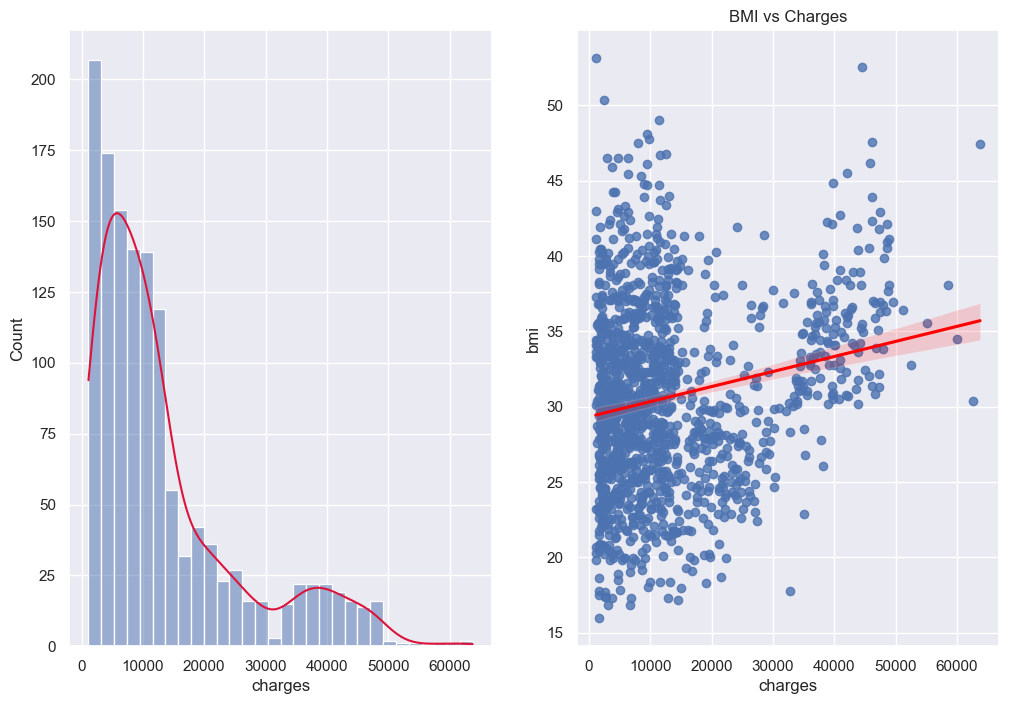

In [659]:
fig, axes = plt.subplots(1,2, figsize=(12,8))
sns.histplot(ax=axes[0], data=df['charges'], kde=True, bins=30)
axes[0].lines[0].set_color('crimson')

sns.regplot(ax=axes[1], data = df, x='charges', y='bmi', line_kws={'color' : 'red'})
axes[1].set_title('BMI vs Charges')
sns.set()

## Data Preprocessing

In [660]:
data_inf = df.sample(10, random_state=2)
data_inf

,sex,smoker,age,bmi,dependents,charges
17,male,no,20,33.330,0,1391.52870
1091,male,no,39,45.430,2,6356.27070
273,female,no,31,29.100,0,3761.29200
270,female,no,51,37.730,1,9877.60770
874,female,no,48,31.130,0,8280.62270
790,male,yes,29,34.400,0,36197.69900
957,male,no,56,40.300,0,10602.38500
492,male,no,31,25.935,1,4239.89265
782,male,no,19,20.300,0,1242.26000
780,male,yes,62,32.015,0,45710.20785


In [661]:
data_train_test = df.drop(index=data_inf.index)
data_train_test

,sex,smoker,age,bmi,dependents,charges
0,male,no,33,35.245,0,12404.87910
1,female,no,46,27.720,1,8232.63880
2,female,no,19,28.900,0,1743.21400
3,male,no,53,26.410,2,11244.37690
4,male,no,18,41.140,0,1146.79660
...,...,...,...,...,...,...
1333,female,no,62,29.920,0,13457.96080
1334,male,yes,56,33.630,0,43921.18370
1335,male,no,21,25.745,2,3279.86855
1336,female,no,30,28.405,1,4527.18295


In [662]:
# reset index
data_train_test.reset_index(drop=True,inplace=True)
data_inf.reset_index(drop=True,inplace=True)

## Train-Test Split

In [663]:
X = data_train_test.drop('charges',axis=1)
y = data_train_test['charges']

In [664]:
X.shape

(1327, 5)

In [665]:
y.shape

(1327,)

In [666]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (1061, 5)
test size: (266, 5)


In [667]:
# cara alternatif
data_train, data_test = train_test_split(data_train_test, test_size=0.2, random_state=42)
print(f'train size: {data_train.shape}')
print(f'test size: {data_test.shape}')

train size: (1061, 6)
test size: (266, 6)


## Handling Outlier

## Handling Missing Values

## Encoding

In [668]:
X_train[cat_col].head(3)

,sex,smoker
410,male,yes
170,male,yes
939,female,no


### Ordinal

In [669]:
from sklearn.preprocessing import OrdinalEncoder

In [670]:
enc = OrdinalEncoder()
enc.fit(X_train[cat_col])

OrdinalEncoder()

In [671]:
X_train.head()

,sex,smoker,age,bmi,dependents
410,male,yes,60,31.35,3
170,male,yes,28,23.98,3
939,female,no,21,17.40,1
1005,male,no,58,34.39,0
209,female,no,47,32.00,1


In [672]:
enc.fit(X_train[cat_col])
enc.transform(X_train[cat_col])

array([[1., 1.],
       [1., 1.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 0.],
       [0., 0.]])

In [673]:
# cara alternatif
enc.fit_transform(X_train[cat_col])

array([[1., 1.],
       [1., 1.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 0.],
       [0., 0.]])

In [674]:
# data train
X_train_new = X_train.copy()
X_train_new[cat_col] = enc.fit_transform(X_train_new[cat_col])
X_train_new.head(6)

,sex,smoker,age,bmi,dependents
410,1.0,1.0,60,31.35,3
170,1.0,1.0,28,23.98,3
939,0.0,0.0,21,17.40,1
1005,1.0,0.0,58,34.39,0
209,0.0,0.0,47,32.00,1
427,0.0,0.0,22,30.40,0


In [675]:
# data test
X_test_new = X_test.copy()
X_test_new[cat_col] = enc.transform(X_test_new[cat_col])
X_test_new.head(6)

,sex,smoker,age,bmi,dependents
890,1.0,0.0,38,28.270,1
115,1.0,0.0,18,37.290,0
543,0.0,0.0,29,31.160,0
175,1.0,1.0,61,35.860,0
63,0.0,0.0,20,37.000,5
485,0.0,0.0,38,40.565,1


gaboleh fit di test data

In [676]:
# X_test_new = X_test.copy()
# X_test_new[cat_col] = enc.fit_transform(X_test_new[cat_col])
# X_test_new.head(6)

In [677]:
# mengatur urutan level
sex_cat = ['male','female']
smoker_cat = ['yes', 'no']

# data train
enc2 = OrdinalEncoder(categories=[sex_cat, smoker_cat])
X_train_new2 = X_train.copy()
X_train_new2[cat_col] = enc2.fit_transform(X_train_new2[cat_col])
X_train_new2.head()

,sex,smoker,age,bmi,dependents
410,0.0,0.0,60,31.35,3
170,0.0,0.0,28,23.98,3
939,1.0,1.0,21,17.40,1
1005,0.0,1.0,58,34.39,0
209,1.0,1.0,47,32.00,1


## One-Hot Encoding

In [678]:
from sklearn.preprocessing import OneHotEncoder

In [679]:
enc3= OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_new3 = X_train.copy()
X_train_ohe = enc3.fit_transform(X_train_new3[cat_col])
X_train_ohe

array([[0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.],
       ...,
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.]])

In [680]:
X_train_new3.head(3)

,sex,smoker,age,bmi,dependents
410,male,yes,60,31.35,3
170,male,yes,28,23.98,3
939,female,no,21,17.40,1


In [681]:
feature_names= enc3.get_feature_names_out(input_features=cat_col)
X_train_ohe= pd.DataFrame(X_train_ohe,columns=feature_names)
X_train_ohe.head(3)

,sex_female,sex_male,smoker_no,smoker_yes
0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0


In [682]:
X_train_new3.reset_index(drop=True, inplace=True)
X_train_with_ohe=pd.concat([X_train_new3,X_train_ohe],axis=1)
X_train_with_ohe.drop(columns=['sex','smoker'],inplace=True)
X_train_with_ohe

,age,bmi,dependents,sex_female,sex_male,smoker_no,smoker_yes
0,60,31.350,3,0.0,1.0,0.0,1.0
1,28,23.980,3,0.0,1.0,0.0,1.0
2,21,17.400,1,1.0,0.0,1.0,0.0
3,58,34.390,0,0.0,1.0,1.0,0.0
4,47,32.000,1,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
1056,59,25.460,1,0.0,1.0,1.0,0.0
1057,18,32.120,2,1.0,0.0,1.0,0.0
1058,55,33.535,2,1.0,0.0,1.0,0.0
1059,20,27.930,0,0.0,1.0,1.0,0.0


## Scaling

In [683]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [684]:
num_col

['age', 'bmi', 'dependents', 'charges']

In [685]:
cat_col

['sex', 'smoker']

In [686]:
num_col.remove('charges')

In [687]:
X_train_new.head(2)

,sex,smoker,age,bmi,dependents
410,1.0,1.0,60,31.35,3
170,1.0,1.0,28,23.98,3


In [688]:
mm_scaler = MinMaxScaler()
X_train_new[num_col] = mm_scaler.fit_transform(X_train_new[num_col])
X_train_new.head(3)

,sex,smoker,age,bmi,dependents
410,1.0,1.0,0.913043,0.420262,0.6
170,1.0,1.0,0.217391,0.219006,0.6
939,0.0,0.0,0.065217,0.039323,0.2


In [689]:
X_test_new[num_col] = mm_scaler.transform(X_test_new[num_col])
X_test_new.head(3)

,sex,smoker,age,bmi,dependents
890,1.0,0.0,0.434783,0.336155,0.2
115,1.0,0.0,0.000000,0.582469,0.0
543,0.0,0.0,0.239130,0.415074,0.0


## Feature Selection

- chi-square
- anova
- random forest feature importance
- rfe
- pearson, spearman, kendall

In [690]:
corr_fitur_target = ['age','bmi','dependents','charges']
xy_train=pd.concat([X_train_new,y_train],axis=1)
xy_train[corr_fitur_target].corr().charges.sort_values(ascending=False)

charges       1.000000
age           0.307461
bmi           0.211184
dependents    0.052066
Name: charges, dtype: float64

## Model Definition
- jelaskan model yang digunakan
- jelaskan parameter yang digunakan
- jelaskan + - dari model

In [691]:
from sklearn.linear_model import LinearRegression

In [692]:
model_lin_reg= LinearRegression()
model_lin_reg.fit(X_train_new, y_train)

LinearRegression()

## Model Evaluation

In [693]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [694]:
print('------Train------')
y_train_pred = model_lin_reg.predict(X_train_new)
print('MAE:',mean_absolute_error(y_train,y_train_pred))
print('MSE:',mean_squared_error(y_train,y_train_pred))

------Train------
MAE: 4159.9656320754075
MSE: 36417050.17643359


In [695]:
print('------Test------')
y_test_pred = model_lin_reg.predict(X_test_new)
print('MAE:',mean_absolute_error(y_test,y_test_pred))
print('MSE:',mean_squared_error(y_test,y_test_pred))

------Test------
MAE: 4401.346929054749
MSE: 38702078.332577586


- apakah modelnya overfitting atau underfitting atau good fit
- kenapa menggunakan MAE atau MSE

In [696]:
# save model
import joblib

with open('model_lin_reg.pkl','wb') as file_1:
    joblib.dump(model_lin_reg,file_1)

with open('model_scaler.pkl','wb') as file_2:
    joblib.dump(mm_scaler,file_2)

with open('model_encoder.pkl','wb') as file_3:
    joblib.dump(enc,file_3)

with open('list_num_cols.txt','wb') as file_4:
    joblib.dump(num_col,file_4)

with open('list_cat_cols.txt','wb') as file_5:
    joblib.dump(cat_col,file_5)

In [697]:
with open('model_lin_reg.pkl','rb') as file_1:
    model_lin_reg = joblib.load(file_1)

with open('model_scaler.pkl','rb') as file_2:
    model_scaler = joblib.load(file_2)

with open('model_encoder.pkl','rb') as file_3:
    model_encoder = joblib.load(file_3)

with open('list_num_cols.txt','rb') as file_4:
    num_cols = joblib.load(file_4)

with open('list_cat_cols.txt','rb') as file_5:
    cat_cols = joblib.load(file_5)

In [698]:
data_inf

,sex,smoker,age,bmi,dependents,charges
0,male,no,20,33.330,0,1391.52870
1,male,no,39,45.430,2,6356.27070
2,female,no,31,29.100,0,3761.29200
3,female,no,51,37.730,1,9877.60770
4,female,no,48,31.130,0,8280.62270
5,male,yes,29,34.400,0,36197.69900
6,male,no,56,40.300,0,10602.38500
7,male,no,31,25.935,1,4239.89265
8,male,no,19,20.300,0,1242.26000
9,male,yes,62,32.015,0,45710.20785


In [699]:
data_inf_num = data_inf[num_cols]
data_inf_cat = data_inf[cat_cols]

In [700]:
data_inf.head(2)

,sex,smoker,age,bmi,dependents,charges
0,male,no,20,33.33,0,1391.5287
1,male,no,39,45.43,2,6356.2707


In [701]:
data_inf_final = data_inf.drop('charges',axis=1)

In [702]:
#scaling data numerik, encoding data category
data_inf_final[num_cols] = model_scaler.transform(data_inf_num)
data_inf_final[cat_cols] = model_encoder.transform(data_inf_cat)

In [703]:
data_inf_final.head(3)

,sex,smoker,age,bmi,dependents
0,1.0,0.0,0.043478,0.474331,0.0
1,1.0,0.0,0.456522,0.804752,0.4
2,0.0,0.0,0.282609,0.358820,0.0


## Model Inference

In [704]:
#predict
y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([ 3958.67700346, 13709.99110642,  5269.23834544, 13717.05395441,
       10347.72542785, 30642.49156064, 15590.19278007,  4808.99890968,
        -579.20929908, 38423.74383289])

In [705]:
# dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['charges_pred'])
y_pred_inf_df

,charges_pred
0,3958.677003
1,13709.991106
2,5269.238345
3,13717.053954
4,10347.725428
5,30642.491561
6,15590.192780
7,4808.998910
8,-579.209299
9,38423.743833


In [706]:
pd.concat([data_inf,y_pred_inf_df],axis=1)

,sex,smoker,age,bmi,dependents,charges,charges_pred
0,male,no,20,33.330,0,1391.52870,3958.677003
1,male,no,39,45.430,2,6356.27070,13709.991106
2,female,no,31,29.100,0,3761.29200,5269.238345
3,female,no,51,37.730,1,9877.60770,13717.053954
4,female,no,48,31.130,0,8280.62270,10347.725428
5,male,yes,29,34.400,0,36197.69900,30642.491561
6,male,no,56,40.300,0,10602.38500,15590.192780
7,male,no,31,25.935,1,4239.89265,4808.998910
8,male,no,19,20.300,0,1242.26000,-579.209299
9,male,yes,62,32.015,0,45710.20785,38423.743833


## Kesimpulan
- EDA bagaimana?
- Analisis Model dan Evaluation
- Further Improvement